In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

## summary combined table

In [ ]:
# combine datasets
combo = pd.merge(mouse_metadata, study_results, how="left", on = "Mouse ID")
combo.tail(1)

In [3]:
combo.columns = ['Mouse ID','Drug Regimen','Sex','Age_months','Weight','Timepoint','Tumor_Volume','Metastatic Sites']
combo.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

#calculating mean value for tumor size

tumor_mean = combo.groupby('Drug Regimen').Tumor_Volume.mean()
tumor_mean

In [ ]:
# calculating median value for tumor size
tumor_median = combo.groupby('Drug Regimen').Tumor_Volume.median()
tumor_median

In [ ]:
#calculating variance for tumor size
tumor_var = combo.groupby('Drug Regimen').Tumor_Volume.var()
tumor_var

In [ ]:
#calculating sd for tumor size
tumor_sd = combo.groupby('Drug Regimen').Tumor_Volume.std()
tumor_sd

In [ ]:
#calculating SEM for tumor size
tumor_sem = combo.groupby('Drug Regimen').Tumor_Volume.sem()
tumor_sem

#  summary statistics table for tumor volume



In [10]:
####### ADD SEM column
# turn groupby object into df

sum_stats = pd.DataFrame({"Mean of Tumor Size":tumor_mean, "Median of Tumor Size":tumor_median,
                          "Variance of Tumor Size": tumor_var, "SD": tumor_sd, "SEM": tumor_sem})
sum_stats

,Mean of Tumor Size,Median of Tumor Size,Variance of Tumor Size,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# figure out what plotting question wants
df = combo.groupby("Drug Regimen").count()
df

# Bar Plot showing number of Data Points for each treatment regimen using Pandas PyPlot

Text(0.5, 1.0, 'Number of Treatments Per Drug')

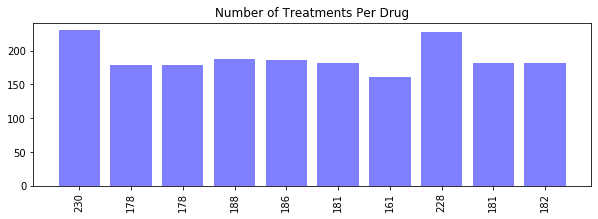

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
#pyplot
x_axis = np.arange(len(df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10, 3))
plt.bar(x_axis, df["Mouse ID"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, df["Mouse ID"], rotation="vertical")
plt.title("Number of Treatments Per Drug")

In [13]:
# USING PANDAS method to plot, not pyplot
# plot Pandas
# reduce df to just columns to be plotted

df_plot = combo[["Drug Regimen","Mouse ID"]]

# Set the index to be "State" so they will be used as labels
df_plot = df_plot.set_index("Drug Regimen")

# create groupby object to find number of data points for each treatment

df_plot = df_plot.groupby("Drug Regimen")["Mouse ID"].count()
df_plot



Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [14]:
# turn that groupby series into a dataframe to plot
df_plot = pd.DataFrame({"Drug Treatments":df_plot})
df_plot

,Drug Treatments
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


# Pandas Dataframe.plot () method for bar chart

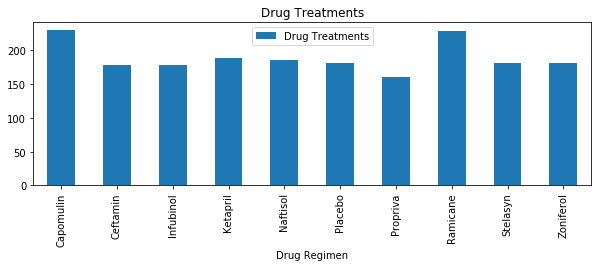

<Figure size 432x288 with 0 Axes>

In [15]:
# Use DataFrame.plot() in order to create a bar chart of the data
df_plot.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Drug Treatments")

plt.show()
plt.tight_layout()

# Two Pie Charts of distribution of mouse gender in study

In [16]:
#Generate a # pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` 
#that shows the distribution of female or male mice in the study.
pie = combo[["Mouse ID","Sex"]]
pie

# set index to sex so that M/F will show as labels
pie = pie.set_index("Sex")
pie

#creat groupby object to find distribution of male and female
pie = pie.groupby("Sex")["Mouse ID"].count()
pie

# turn series created by above group by back to a datafram ready to plot
pie = pd.DataFrame({"Mouse Gender":pie})
pie

,Mouse Gender
Sex,
Female,935
Male,958


## Panda DataFrame Plot Method

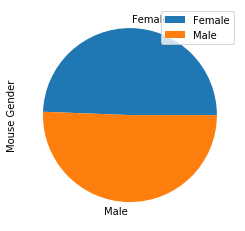

In [17]:
# show Panda DataFrame Plot ###FIX LABELS###
plot = pie.plot.pie(y="Mouse Gender")
plot



# pyplot method

C:\Users\lizba\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'Mouse Gender in Study')

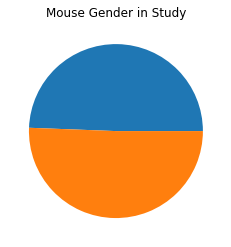

In [44]:
# now make same chart using pyplot ###SAME FIXES HERE, A START
plt.pie(pie)

plt.title("Mouse Gender in Study")


# Calculate the final tumor volume for each mouse in most promising treatments
## Capomulin, Ramicane, Infubinol, Ceftamin
## Calculate the IQR and quantitatively determine 
## if there are any potential outliers.

In [19]:
# find unqiue mice
mice = combo.groupby("Drug Regimen")["Mouse ID"].count()
mice

times = combo.groupby(["Drug Regimen","Mouse ID"])["Timepoint","Tumor_Volume"].max()
times.head(2)



Timepoint  Tumor_Volume
Drug Regimen Mouse ID                         
Capomulin    b128             45     45.651331
             b742             45     45.000000

In [20]:
#times.reset_index(level=['Drug Regimen'])


#times = pd.DataFrame(times)
#times

In [21]:
# reduce df to only show threatments that occurerd at the final time point of 45

final = combo.loc[(combo['Timepoint'] == 45)]
final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


## Ramicane results, sum stats and box plot.

In [22]:
Ramicane = final.loc[(final["Drug Regimen"] == "Ramicane")]
                  
Ramicane.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0


In [23]:
#find quartlies of final tumor volume in Ramican treatment

quartiles = Ramicane['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Ramicane treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Ramicane treatment is: 30.981175224999998
The upper quartile of FTV is: 38.508305307499995
The interquartile range of FTV is: 7.527130082499998
The the median of FTV is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


## boxplot for Ramicine

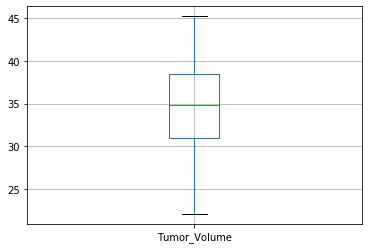

In [24]:
boxplot = Ramicane.boxplot(column=['Tumor_Volume'])


# DatFrame for just Capomulin resulst for last tumor volume, sum stats, and box plot.

In [25]:
# find results for just Capomulin
Capomulin = final.loc[(final['Drug Regimen'] == "Capomulin")]
Capomulin.head(1)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [26]:
#find quartlies of final tumor volume in Capomulin treatment

quartiles = Capomulin['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Capomulin treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Capomulin treatment is: 32.37735684
The upper quartile of FTV is: 40.1592203
The interquartile range of FTV is: 7.781863460000004
The the median of FTV is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


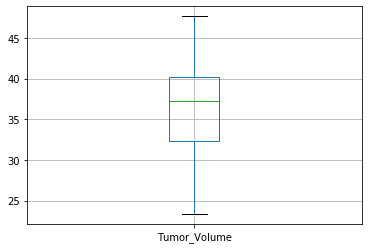

In [27]:
boxplot = Capomulin.boxplot(column=['Tumor_Volume'])

# DataFrame for just Infubinol results for last tumor volume, sum stats, and box plot.

In [45]:
Infubinol = final.loc[(final['Drug Regimen'] == "Infubinol")]
Infubinol.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2
800,e476,Infubinol,Male,23,26,45,62.435404,1


In [ ]:
quartiles = Infubinol['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Infubinol treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
boxplot = Infubinol.boxplot(column=['Tumor_Volume'])

# Just Ceftamin

In [48]:
Ceftamin = final.loc[(final['Drug Regimen'] == "Ceftamin")]
Ceftamin.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [49]:
quartiles = Ceftamin['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Ceftamin treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Ceftamin treatment is: 61.43389223
The upper quartile of FTV is: 67.52748237
The interquartile range of FTV is: 6.093590140000003
The the median of FTV is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


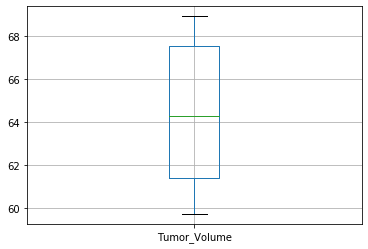

In [50]:
boxplot = Ceftamin.boxplot(column=['Tumor_Volume'])

## Summary BOX PLOTS on four nest treatments

Text(0.5, 1.0, 'Ceftamin')

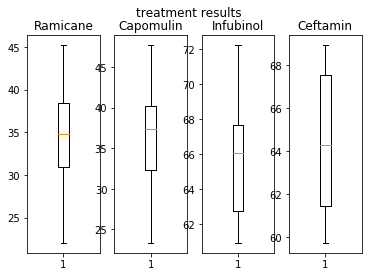

In [54]:
fig, ax = plt.subplots(1, 4)

fig.suptitle("treatment results")
ax[0].boxplot(Ramicane["Tumor_Volume"])
ax[0].set_title("Ramicane")
ax[1].boxplot(Capomulin["Tumor_Volume"])
ax[1].set_title("Capomulin")
ax[2].boxplot(Infubinol["Tumor_Volume"])
ax[2].set_title("Infubinol")
ax[3].boxplot(Ceftamin["Tumor_Volume"])
ax[3].set_title("Ceftamin")


# Capomulin Treatments

In [52]:
 #Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

 #Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

 #Calculate the correlation coefficient and linear regression model between mouse weig


Cap_Treatment = combo.loc[(combo["Drug Regimen"] =="Capomulin")]


Cap_Treatment.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0


## line plot of time point versus tumor volume for a single mouse treated with Capomulin.

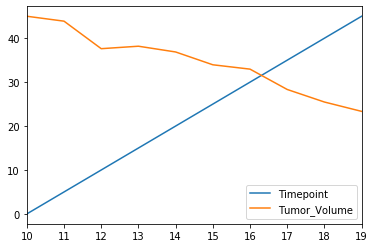

In [53]:
single_mouse = Cap_Treatment.loc[(Cap_Treatment["Mouse ID"]== "s185")]

test = single_mouse.drop(columns=["Sex","Age_months","Weight","Metastatic Sites"])

test

test.plot.line()


In [ ]:
 #Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
    

    
    




In [57]:
# use groupby to find mean tumor volume by mouse weight

weight_volume = Cap_Treatment.groupby("Tumor_Volume").mean()
weight_volume

weight_volume['Tumor_Volume'] = weight_volume.index
weight_volume

,Age_months,Weight,Timepoint,Metastatic Sites,Tumor_Volume
Tumor_Volume,,,,,
23.343598,3.0,17.0,45.0,1.0,23.343598
25.472143,3.0,17.0,40.0,1.0,25.472143
28.167397,16.0,15.0,40.0,0.0,28.167397
28.328531,3.0,17.0,35.0,1.0,28.328531
28.430964,22.0,17.0,45.0,1.0,28.430964
...,...,...,...,...,...
47.373423,12.0,25.0,15.0,0.0,47.373423
47.488599,17.0,21.0,15.0,1.0,47.488599
47.685963,1.0,24.0,45.0,1.0,47.685963


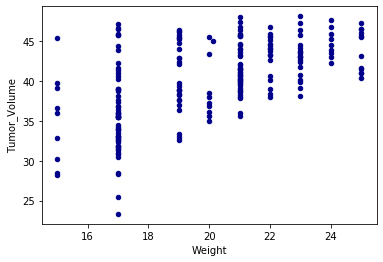

In [58]:
ax1 = weight_volume.plot.scatter(x='Weight',
                       y='Tumor_Volume',
                       c='DarkBlue')